In [1]:
import pandas as pd
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
from matplotlib import rc
import statsmodels.formula.api as smf
import seaborn as sns

# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':20})

# Set the font used for MathJax - more on this later
rc('mathtext',**{'default':'regular'})

In [2]:
# load data
DataControls = pd.read_csv('DataFromControls.csv')
DataParkinsons = pd.read_csv('DataFromParkinsons.csv')
DataRBD = pd.read_csv('DataFromRBD.csv')

# Group Difference Analysis - ANCOVA

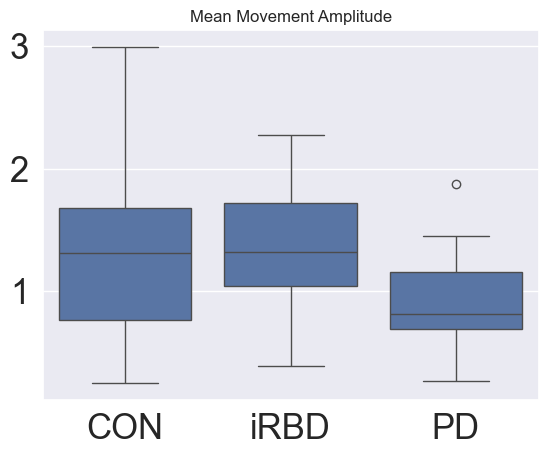

Mean Amplidute
Controls ->  Mean: 1.290, std: 0.601
Parkinsons ->  Mean: 0.896, std: 0.400
RBD ->  Mean: 1.382, std: 0.485


,Source,SS,DF,F,p-unc,np2
0,Condition,2.999147,2,5.157675,0.007765,0.111740
1,Age,0.026963,1,0.092737,0.761498,0.001130
2,Sex,1.440328,1,4.953903,0.028777,0.056972
3,Residual,23.841174,82,NaN,NaN,NaN


In [25]:
#Ancova analaysis between the three groups form Mean Amplitude with Age and Sex as covariates

subSelected = ['MeanAmplitude']
data = {
    'Measure' : pd.concat([DataControls[subSelected].astype(float), DataParkinsons[subSelected].astype(float), DataRBD[subSelected].astype(float)], ignore_index=True).values.ravel(),
    'Condition' : ['CON']*len(DataControls) + ['PDL']*len(DataParkinsons) + ['RBD']*len(DataRBD),
    'Age' :  pd.concat([DataControls['AGE'].astype(float), DataParkinsons['AGE'].astype(float), DataRBD['AGE'].astype(float)], ignore_index=True).values.ravel(),
    'Sex' :  pd.concat([DataControls['SEX'].astype(float), DataParkinsons['SEX'].astype(float), DataRBD['SEX'].astype(float)], ignore_index=True).values.ravel(),
    'Subject' : pd.concat([DataControls['ID'], DataParkinsons['ID'], DataRBD['ID']], ignore_index=True).values.ravel(),
}
df = pd.DataFrame(data)
df = df.dropna()

sns.set_theme(style="darkgrid")
# palette = get_hex("Acadia", keep_first_n=3)
sns.boxplot(x=df["Condition"], y=df["Measure"],data=df, order=["CON", "RBD", "PDL"]).set(
    xlabel='', 
    ylabel='',
)
plt.tick_params(labelsize=25)
plt.xticks([0,1,2],["CON", "iRBD", "PD"])
plt.title('Mean Movement Amplitude')

plt.show()

print('Mean Amplidute')
print(f'Controls ->  Mean: {df[df["Condition"] == "CON"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "CON"]["Measure"].values.std():.3f}')
print(f'Parkinsons ->  Mean: {df[df["Condition"] == "PDL"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "PDL"]["Measure"].values.std():.3f}')
print(f'RBD ->  Mean: {df[df["Condition"] == "RBD"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "RBD"]["Measure"].values.std():.3f}')


df.ancova(dv='Measure', between='Condition', covar=['Age', 'Sex'])


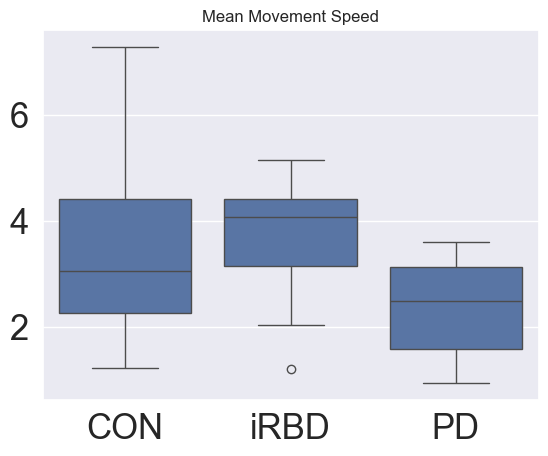

Mean Speed
Controls ->  Mean: 3.423, std: 1.487
Parkinsons ->  Mean: 2.393, std: 0.882
RBD ->  Mean: 3.732, std: 0.997


,Source,SS,DF,F,p-unc,np2
0,Condition,19.169958,2,5.541656,0.005529,0.119069
1,Age,0.071696,1,0.041452,0.839173,0.000505
2,Sex,0.316444,1,0.182955,0.669967,0.002226
3,Residual,141.829149,82,NaN,NaN,NaN


In [24]:
#Ancova analaysis between the three groups form Mean Speed with Age and Sex as covariates

subSelected = ['MeanSpeed']
data = {
    'Measure' : pd.concat([DataControls[subSelected].astype(float), DataParkinsons[subSelected].astype(float), DataRBD[subSelected].astype(float)], ignore_index=True).values.ravel(),
    'Condition' : ['CON']*len(DataControls) + ['PDL']*len(DataParkinsons) + ['RBD']*len(DataRBD),
    'Age' :  pd.concat([DataControls['AGE'].astype(float), DataParkinsons['AGE'].astype(float), DataRBD['AGE'].astype(float)], ignore_index=True).values.ravel(),
    'Sex' :  pd.concat([DataControls['SEX'].astype(float), DataParkinsons['SEX'].astype(float), DataRBD['SEX'].astype(float)], ignore_index=True).values.ravel(),
    'Subject' : pd.concat([DataControls['ID'], DataParkinsons['ID'], DataRBD['ID']], ignore_index=True).values.ravel(),
}
df = pd.DataFrame(data)
df = df.dropna()

sns.set_theme(style="darkgrid")
# palette = get_hex("Acadia", keep_first_n=3)
sns.boxplot(x=df["Condition"], y=df["Measure"],data=df, order=["CON", "RBD", "PDL"]).set(
    xlabel='', 
    ylabel='',
)
plt.tick_params(labelsize=25)
plt.xticks([0,1,2],["CON", "iRBD", "PD"])
plt.title('Mean Movement Speed')

plt.show()

print('Mean Speed')
print(f'Controls ->  Mean: {df[df["Condition"] == "CON"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "CON"]["Measure"].values.std():.3f}')
print(f'Parkinsons ->  Mean: {df[df["Condition"] == "PDL"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "PDL"]["Measure"].values.std():.3f}')
print(f'RBD ->  Mean: {df[df["Condition"] == "RBD"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "RBD"]["Measure"].values.std():.3f}')


df.ancova(dv='Measure', between='Condition', covar=['Age', 'Sex'])

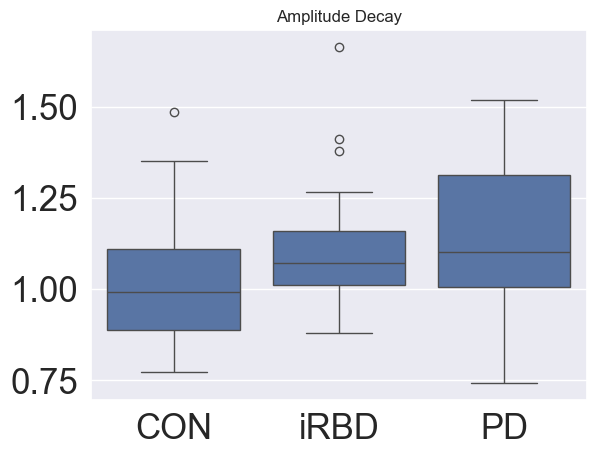

Amplitude Decay
Controls ->  Mean: 1.009, std: 0.161
Parkinsons ->  Mean: 1.134, std: 0.228
RBD ->  Mean: 1.123, std: 0.180


,Source,SS,DF,F,p-unc,np2
0,Condition,0.258359,2,3.924849,0.023561,0.087365
1,Age,0.008250,1,0.250650,0.617959,0.003047
2,Sex,0.154742,1,4.701499,0.033034,0.054226
3,Residual,2.698888,82,NaN,NaN,NaN


In [23]:
#Ancova analaysis between the three groups form amplitude decay with Age and Sex as covariates

subSelected = ['amplitudeDecay']
data = {
    'Measure' : pd.concat([DataControls[subSelected].astype(float), DataParkinsons[subSelected].astype(float), DataRBD[subSelected].astype(float)], ignore_index=True).values.ravel(),
    'Condition' : ['CON']*len(DataControls) + ['PDL']*len(DataParkinsons) + ['RBD']*len(DataRBD),
    'Age' :  pd.concat([DataControls['AGE'].astype(float), DataParkinsons['AGE'].astype(float), DataRBD['AGE'].astype(float)], ignore_index=True).values.ravel(),
    'Sex' :  pd.concat([DataControls['SEX'].astype(float), DataParkinsons['SEX'].astype(float), DataRBD['SEX'].astype(float)], ignore_index=True).values.ravel(),
    'Subject' : pd.concat([DataControls['ID'], DataParkinsons['ID'], DataRBD['ID']], ignore_index=True).values.ravel(),
}
df = pd.DataFrame(data)
df = df.dropna()

sns.set_theme(style="darkgrid")
# palette = get_hex("Acadia", keep_first_n=3)
sns.boxplot(x=df["Condition"], y=df["Measure"],data=df, order=["CON", "RBD", "PDL"]).set(
    xlabel='', 
    ylabel='',
)
plt.tick_params(labelsize=25)
plt.xticks([0,1,2],["CON", "iRBD", "PD"])
plt.title('Amplitude Decay')

plt.show()

print('Amplitude Decay')
print(f'Controls ->  Mean: {df[df["Condition"] == "CON"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "CON"]["Measure"].values.std():.3f}')
print(f'Parkinsons ->  Mean: {df[df["Condition"] == "PDL"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "PDL"]["Measure"].values.std():.3f}')
print(f'RBD ->  Mean: {df[df["Condition"] == "RBD"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "RBD"]["Measure"].values.std():.3f}')


df.ancova(dv='Measure', between='Condition', covar=['Age', 'Sex'])




Speed Decay
Controls ->  Mean: 0.983, std: 0.139
Parkinsons ->  Mean: 1.139, std: 0.180
RBD ->  Mean: 1.072, std: 0.107


,Source,SS,DF,F,p-unc,np2
0,Condition,0.341727,2,8.370647,0.000492,0.169547
1,Age,0.047090,1,2.306959,0.132642,0.027364
2,Sex,0.040699,1,1.993876,0.161720,0.023738
3,Residual,1.673801,82,NaN,NaN,NaN


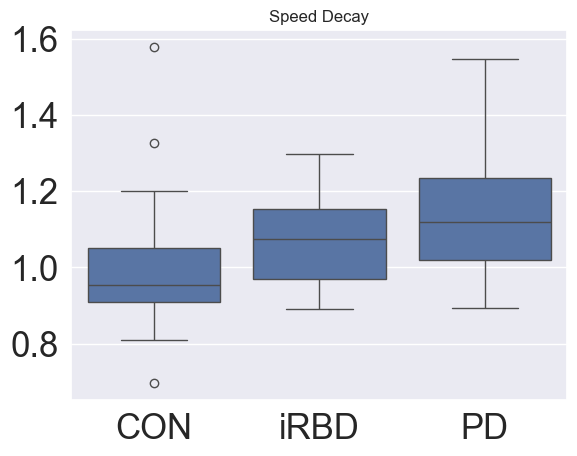

In [26]:
#Ancova analaysis between the three groups form amplitude decay with Age and Sex as covariates

subSelected = ['velocityDecay']
data = {
    'Measure' : pd.concat([DataControls[subSelected].astype(float), DataParkinsons[subSelected].astype(float), DataRBD[subSelected].astype(float)], ignore_index=True).values.ravel(),
    'Condition' : ['CON']*len(DataControls) + ['PDL']*len(DataParkinsons) + ['RBD']*len(DataRBD),
    'Age' :  pd.concat([DataControls['AGE'].astype(float), DataParkinsons['AGE'].astype(float), DataRBD['AGE'].astype(float)], ignore_index=True).values.ravel(),
    'Sex' :  pd.concat([DataControls['SEX'].astype(float), DataParkinsons['SEX'].astype(float), DataRBD['SEX'].astype(float)], ignore_index=True).values.ravel(),
    'Subject' : pd.concat([DataControls['ID'], DataParkinsons['ID'], DataRBD['ID']], ignore_index=True).values.ravel(),
}
df = pd.DataFrame(data)
df = df.dropna()

sns.set_theme(style="darkgrid")
# palette = get_hex("Acadia", keep_first_n=3)
sns.boxplot(x=df["Condition"], y=df["Measure"],data=df, order=["CON", "RBD", "PDL"]).set(
    xlabel='', 
    ylabel='',
)
plt.tick_params(labelsize=25)
plt.xticks([0,1,2],["CON", "iRBD", "PD"])
plt.title('Speed Decay')

print('Speed Decay')
print(f'Controls ->  Mean: {df[df["Condition"] == "CON"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "CON"]["Measure"].values.std():.3f}')
print(f'Parkinsons ->  Mean: {df[df["Condition"] == "PDL"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "PDL"]["Measure"].values.std():.3f}')
print(f'RBD ->  Mean: {df[df["Condition"] == "RBD"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "RBD"]["Measure"].values.std():.3f}')


df.ancova(dv='Measure', between='Condition', covar=['Age', 'Sex'])

# Comparing by pairs of groups - Tukey's Test

In [28]:
subSelected = ['MeanAmplitude']

data = {
    'Measure' : pd.concat([DataControls[subSelected].astype(float), DataParkinsons[subSelected].astype(float)], ignore_index=True).values.ravel(),
    'Condition' : ['CON']*len(DataControls) + ['PDL']*len(DataParkinsons),
    'Age' :  pd.concat([DataControls['AGE'].astype(float), DataParkinsons['AGE'].astype(float)], ignore_index=True).values.ravel(),
    'Sex' :  pd.concat([DataControls['SEX'].astype(float), DataParkinsons['SEX'].astype(float)], ignore_index=True).values.ravel(),
    'Subject' : pd.concat([DataControls['ID'], DataParkinsons['ID']], ignore_index=True).values.ravel(),
}
df = pd.DataFrame(data)
df = df.dropna()

print('Mean Amplitude  CON vs PD')
print(f'Controls ->  Mean: {df[df["Condition"] == "CON"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "CON"]["Measure"].values.std():.3f}')
print(f'Parkinsons ->  Mean: {df[df["Condition"] == "PDL"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "PDL"]["Measure"].values.std():.3f}')


df.ancova(dv='Measure', between='Condition', covar=['Age', 'Sex'])

x = DataControls[subSelected].values.astype(float).ravel(),
y = DataParkinsons[subSelected].values.astype(float).ravel()

df.pairwise_tukey(dv='Measure', between='Condition').round(3)

Mean Amplitude  CON vs PD
Controls ->  Mean: 1.290, std: 0.601
Parkinsons ->  Mean: 0.896, std: 0.400


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,CON,PDL,1.29,0.896,0.394,0.155,2.54,0.013,0.692


In [29]:
subSelected =  ['MeanAmplitude']

data = {
    'Measure' : pd.concat([DataControls[subSelected].astype(float), DataRBD[subSelected].astype(float)], ignore_index=True).values.ravel(),
    'Condition' : ['CON']*len(DataControls) + ['RBD']*len(DataRBD),
    'Age' :  pd.concat([DataControls['AGE'].astype(float), DataRBD['AGE'].astype(float)], ignore_index=True).values.ravel(),
    'Sex' :  pd.concat([DataControls['SEX'].astype(float), DataRBD['SEX'].astype(float)], ignore_index=True).values.ravel(),
    'Subject' : pd.concat([DataControls['ID'], DataRBD['ID']], ignore_index=True).values.ravel(),
}
df = pd.DataFrame(data)
df = df.dropna()

print('Mean Amplitude  CON vs RBD')
print(f'Controls ->  Mean: {df[df["Condition"] == "CON"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "CON"]["Measure"].values.std():.3f}')
print(f'RBD ->  Mean: {df[df["Condition"] == "RBD"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "RBD"]["Measure"].values.std():.3f}')


df.ancova(dv='Measure', between='Condition', covar=['Age', 'Sex'])


x = DataRBD[subSelected].values.astype(float).ravel(),
y = DataControls[subSelected].values.astype(float).ravel(),

pg.ttest(x[0],y[0], alternative = 'greater')
df.pairwise_tukey(dv='Measure', between='Condition').round(3)

Mean Amplitude  CON vs RBD
Controls ->  Mean: 1.290, std: 0.601
RBD ->  Mean: 1.382, std: 0.485


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,CON,RBD,1.29,1.382,-0.092,0.153,-0.602,0.549,-0.158


In [30]:
subSelected =  ['MeanAmplitude']

data = {
    'Measure' : pd.concat([DataRBD[subSelected].astype(float), DataParkinsons[subSelected].astype(float)], ignore_index=True).values.ravel(),
    'Condition' : ['RBD']*len(DataRBD) + ['PDL']*len(DataParkinsons),
    'Age' :  pd.concat([DataRBD['AGE'].astype(float), DataParkinsons['AGE'].astype(float)], ignore_index=True).values.ravel(),
    'Sex' :  pd.concat([DataRBD['SEX'].astype(float), DataParkinsons['SEX'].astype(float)], ignore_index=True).values.ravel(),
    'Subject' : pd.concat([DataRBD['ID'], DataParkinsons['ID']], ignore_index=True).values.ravel(),
}
df = pd.DataFrame(data)
df = df.dropna()

print('Mean Amplitude  RBD vs PD')
print(f'RBD ->  Mean: {df[df["Condition"] == "RBD"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "RBD"]["Measure"].values.std():.3f}')
print(f'Parkinsons ->  Mean: {df[df["Condition"] == "PDL"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "PDL"]["Measure"].values.std():.3f}')



df.ancova(dv='Measure', between='Condition', covar=['Age', 'Sex'])


x = DataParkinsons[subSelected].values.astype(float).ravel(),
y = DataRBD[subSelected].values.astype(float).ravel(),

pg.ttest(x[0],y[0], alternative = 'greater')
df.pairwise_tukey(dv='Measure', between='Condition').round(3)

Mean Amplitude  RBD vs PD
RBD ->  Mean: 1.382, std: 0.485
Parkinsons ->  Mean: 0.896, std: 0.400


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,PDL,RBD,0.896,1.382,-0.486,0.149,-3.262,0.002,-1.038


In [31]:
subSelected = ['MeanSpeed']

data = {
    'Measure' : pd.concat([DataControls[subSelected].astype(float), DataParkinsons[subSelected].astype(float)], ignore_index=True).values.ravel(),
    'Condition' : ['CON']*len(DataControls) + ['PDL']*len(DataParkinsons),
    'Age' :  pd.concat([DataControls['AGE'].astype(float), DataParkinsons['AGE'].astype(float)], ignore_index=True).values.ravel(),
    'Sex' :  pd.concat([DataControls['SEX'].astype(float), DataParkinsons['SEX'].astype(float)], ignore_index=True).values.ravel(),
    'Subject' : pd.concat([DataControls['ID'], DataParkinsons['ID']], ignore_index=True).values.ravel(),
}
df = pd.DataFrame(data)
df = df.dropna()

print('Mean Speed  CON vs PD')
print(f'Controls ->  Mean: {df[df["Condition"] == "CON"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "CON"]["Measure"].values.std():.3f}')
print(f'Parkinsons ->  Mean: {df[df["Condition"] == "PDL"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "PDL"]["Measure"].values.std():.3f}')


df.ancova(dv='Measure', between='Condition', covar=['Age', 'Sex'])

x = DataControls[subSelected].values.astype(float).ravel(),
y = DataParkinsons[subSelected].values.astype(float).ravel()

df.pairwise_tukey(dv='Measure', between='Condition').round(3)

Mean Speed  CON vs PD
Controls ->  Mean: 3.423, std: 1.487
Parkinsons ->  Mean: 2.393, std: 0.882


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,CON,PDL,3.423,2.393,1.031,0.378,2.725,0.008,0.742


In [32]:
subSelected =  ['MeanSpeed']

data = {
    'Measure' : pd.concat([DataControls[subSelected].astype(float), DataRBD[subSelected].astype(float)], ignore_index=True).values.ravel(),
    'Condition' : ['CON']*len(DataControls) + ['RBD']*len(DataRBD),
    'Age' :  pd.concat([DataControls['AGE'].astype(float), DataRBD['AGE'].astype(float)], ignore_index=True).values.ravel(),
    'Sex' :  pd.concat([DataControls['SEX'].astype(float), DataRBD['SEX'].astype(float)], ignore_index=True).values.ravel(),
    'Subject' : pd.concat([DataControls['ID'], DataRBD['ID']], ignore_index=True).values.ravel(),
}
df = pd.DataFrame(data)
df = df.dropna()

print('Mean Speed  CON vs RBD')
print(f'Controls ->  Mean: {df[df["Condition"] == "CON"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "CON"]["Measure"].values.std():.3f}')
print(f'RBD ->  Mean: {df[df["Condition"] == "RBD"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "RBD"]["Measure"].values.std():.3f}')


df.ancova(dv='Measure', between='Condition', covar=['Age', 'Sex'])


x = DataRBD[subSelected].values.astype(float).ravel(),
y = DataControls[subSelected].values.astype(float).ravel(),

pg.ttest(x[0],y[0], alternative = 'greater')
df.pairwise_tukey(dv='Measure', between='Condition').round(3)

Mean Speed  CON vs RBD
Controls ->  Mean: 3.423, std: 1.487
RBD ->  Mean: 3.732, std: 0.997


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,CON,RBD,3.423,3.732,-0.308,0.367,-0.84,0.404,-0.22


In [33]:
subSelected =  ['MeanSpeed']

data = {
    'Measure' : pd.concat([DataRBD[subSelected].astype(float), DataParkinsons[subSelected].astype(float)], ignore_index=True).values.ravel(),
    'Condition' : ['RBD']*len(DataRBD) + ['PDL']*len(DataParkinsons),
    'Age' :  pd.concat([DataRBD['AGE'].astype(float), DataParkinsons['AGE'].astype(float)], ignore_index=True).values.ravel(),
    'Sex' :  pd.concat([DataRBD['SEX'].astype(float), DataParkinsons['SEX'].astype(float)], ignore_index=True).values.ravel(),
    'Subject' : pd.concat([DataRBD['ID'], DataParkinsons['ID']], ignore_index=True).values.ravel(),
}
df = pd.DataFrame(data)
df = df.dropna()

print('Mean Speed  RBD vs PD')
print(f'RBD ->  Mean: {df[df["Condition"] == "RBD"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "RBD"]["Measure"].values.std():.3f}')
print(f'Parkinsons ->  Mean: {df[df["Condition"] == "PDL"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "PDL"]["Measure"].values.std():.3f}')



df.ancova(dv='Measure', between='Condition', covar=['Age', 'Sex'])


x = DataParkinsons[subSelected].values.astype(float).ravel(),
y = DataRBD[subSelected].values.astype(float).ravel(),

pg.ttest(x[0],y[0], alternative = 'greater')
df.pairwise_tukey(dv='Measure', between='Condition').round(3)

Mean Speed  RBD vs PD
RBD ->  Mean: 3.732, std: 0.997
Parkinsons ->  Mean: 2.393, std: 0.882


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,PDL,RBD,2.393,3.732,-1.339,0.315,-4.25,0.0,-1.352


In [34]:
subSelected = ['amplitudeDecay']

data = {
    'Measure' : pd.concat([DataControls[subSelected].astype(float), DataParkinsons[subSelected].astype(float)], ignore_index=True).values.ravel(),
    'Condition' : ['CON']*len(DataControls) + ['PDL']*len(DataParkinsons),
    'Age' :  pd.concat([DataControls['AGE'].astype(float), DataParkinsons['AGE'].astype(float)], ignore_index=True).values.ravel(),
    'Sex' :  pd.concat([DataControls['SEX'].astype(float), DataParkinsons['SEX'].astype(float)], ignore_index=True).values.ravel(),
    'Subject' : pd.concat([DataControls['ID'], DataParkinsons['ID']], ignore_index=True).values.ravel(),
}
df = pd.DataFrame(data)
df = df.dropna()

print('Amplitude Decay  CON vs PD')
print(f'Controls ->  Mean: {df[df["Condition"] == "CON"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "CON"]["Measure"].values.std():.3f}')
print(f'Parkinsons ->  Mean: {df[df["Condition"] == "PDL"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "PDL"]["Measure"].values.std():.3f}')


df.ancova(dv='Measure', between='Condition', covar=['Age', 'Sex'])

x = DataControls[subSelected].values.astype(float).ravel(),
y = DataParkinsons[subSelected].values.astype(float).ravel()

df.pairwise_tukey(dv='Measure', between='Condition').round(3)

Amplitude Decay  CON vs PD
Controls ->  Mean: 1.009, std: 0.161
Parkinsons ->  Mean: 1.134, std: 0.228


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,CON,PDL,1.009,1.134,-0.125,0.051,-2.462,0.016,-0.671


In [35]:
subSelected =  ['amplitudeDecay']

data = {
    'Measure' : pd.concat([DataControls[subSelected].astype(float), DataRBD[subSelected].astype(float)], ignore_index=True).values.ravel(),
    'Condition' : ['CON']*len(DataControls) + ['RBD']*len(DataRBD),
    'Age' :  pd.concat([DataControls['AGE'].astype(float), DataRBD['AGE'].astype(float)], ignore_index=True).values.ravel(),
    'Sex' :  pd.concat([DataControls['SEX'].astype(float), DataRBD['SEX'].astype(float)], ignore_index=True).values.ravel(),
    'Subject' : pd.concat([DataControls['ID'], DataRBD['ID']], ignore_index=True).values.ravel(),
}
df = pd.DataFrame(data)
df = df.dropna()

print('Amplitude Decay  CON vs RBD')
print(f'Controls ->  Mean: {df[df["Condition"] == "CON"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "CON"]["Measure"].values.std():.3f}')
print(f'RBD ->  Mean: {df[df["Condition"] == "RBD"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "RBD"]["Measure"].values.std():.3f}')


df.ancova(dv='Measure', between='Condition', covar=['Age', 'Sex'])


x = DataRBD[subSelected].values.astype(float).ravel(),
y = DataControls[subSelected].values.astype(float).ravel(),

pg.ttest(x[0],y[0], alternative = 'greater')
df.pairwise_tukey(dv='Measure', between='Condition').round(3)

Amplitude Decay  CON vs RBD
Controls ->  Mean: 1.009, std: 0.161
RBD ->  Mean: 1.123, std: 0.180


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,CON,RBD,1.009,1.123,-0.114,0.045,-2.541,0.013,-0.667


In [36]:
subSelected =  ['amplitudeDecay']

data = {
    'Measure' : pd.concat([DataRBD[subSelected].astype(float), DataParkinsons[subSelected].astype(float)], ignore_index=True).values.ravel(),
    'Condition' : ['RBD']*len(DataRBD) + ['PDL']*len(DataParkinsons),
    'Age' :  pd.concat([DataRBD['AGE'].astype(float), DataParkinsons['AGE'].astype(float)], ignore_index=True).values.ravel(),
    'Sex' :  pd.concat([DataRBD['SEX'].astype(float), DataParkinsons['SEX'].astype(float)], ignore_index=True).values.ravel(),
    'Subject' : pd.concat([DataRBD['ID'], DataParkinsons['ID']], ignore_index=True).values.ravel(),
}
df = pd.DataFrame(data)
df = df.dropna()

print('Amplitude Decay  RBD vs PD')
print(f'RBD ->  Mean: {df[df["Condition"] == "RBD"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "RBD"]["Measure"].values.std():.3f}')
print(f'Parkinsons ->  Mean: {df[df["Condition"] == "PDL"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "PDL"]["Measure"].values.std():.3f}')



df.ancova(dv='Measure', between='Condition', covar=['Age', 'Sex'])


x = DataParkinsons[subSelected].values.astype(float).ravel(),
y = DataRBD[subSelected].values.astype(float).ravel(),

pg.ttest(x[0],y[0], alternative = 'greater')
df.pairwise_tukey(dv='Measure', between='Condition').round(3)

Amplitude Decay  RBD vs PD
RBD ->  Mean: 1.123, std: 0.180
Parkinsons ->  Mean: 1.134, std: 0.228


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,PDL,RBD,1.134,1.123,0.011,0.068,0.162,0.873,0.051


In [37]:
subSelected = ['velocityDecay']

data = {
    'Measure' : pd.concat([DataControls[subSelected].astype(float), DataParkinsons[subSelected].astype(float)], ignore_index=True).values.ravel(),
    'Condition' : ['CON']*len(DataControls) + ['PDL']*len(DataParkinsons),
    'Age' :  pd.concat([DataControls['AGE'].astype(float), DataParkinsons['AGE'].astype(float)], ignore_index=True).values.ravel(),
    'Sex' :  pd.concat([DataControls['SEX'].astype(float), DataParkinsons['SEX'].astype(float)], ignore_index=True).values.ravel(),
    'Subject' : pd.concat([DataControls['ID'], DataParkinsons['ID']], ignore_index=True).values.ravel(),
}
df = pd.DataFrame(data)
df = df.dropna()

print('Velocity Decay  CON vs PD')
print(f'Controls ->  Mean: {df[df["Condition"] == "CON"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "CON"]["Measure"].values.std():.3f}')
print(f'Parkinsons ->  Mean: {df[df["Condition"] == "PDL"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "PDL"]["Measure"].values.std():.3f}')


df.ancova(dv='Measure', between='Condition', covar=['Age', 'Sex'])

x = DataControls[subSelected].values.astype(float).ravel(),
y = DataParkinsons[subSelected].values.astype(float).ravel()

df.pairwise_tukey(dv='Measure', between='Condition').round(3)

Velocity Decay  CON vs PD
Controls ->  Mean: 0.983, std: 0.139
Parkinsons ->  Mean: 1.139, std: 0.180


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,CON,PDL,0.983,1.139,-0.155,0.042,-3.673,0.0,-1.001


In [38]:
subSelected =  ['velocityDecay']

data = {
    'Measure' : pd.concat([DataControls[subSelected].astype(float), DataRBD[subSelected].astype(float)], ignore_index=True).values.ravel(),
    'Condition' : ['CON']*len(DataControls) + ['RBD']*len(DataRBD),
    'Age' :  pd.concat([DataControls['AGE'].astype(float), DataRBD['AGE'].astype(float)], ignore_index=True).values.ravel(),
    'Sex' :  pd.concat([DataControls['SEX'].astype(float), DataRBD['SEX'].astype(float)], ignore_index=True).values.ravel(),
    'Subject' : pd.concat([DataControls['ID'], DataRBD['ID']], ignore_index=True).values.ravel(),
}
df = pd.DataFrame(data)
df = df.dropna()

print('Velocity Decay  CON vs RBD')
print(f'Controls ->  Mean: {df[df["Condition"] == "CON"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "CON"]["Measure"].values.std():.3f}')
print(f'RBD ->  Mean: {df[df["Condition"] == "RBD"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "RBD"]["Measure"].values.std():.3f}')


df.ancova(dv='Measure', between='Condition', covar=['Age', 'Sex'])


x = DataRBD[subSelected].values.astype(float).ravel(),
y = DataControls[subSelected].values.astype(float).ravel(),

pg.ttest(x[0],y[0], alternative = 'greater')
df.pairwise_tukey(dv='Measure', between='Condition').round(3)

Velocity Decay  CON vs RBD
Controls ->  Mean: 0.983, std: 0.139
RBD ->  Mean: 1.072, std: 0.107


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,CON,RBD,0.983,1.072,-0.089,0.035,-2.525,0.014,-0.662


In [39]:
subSelected =  ['velocityDecay']

data = {
    'Measure' : pd.concat([DataRBD[subSelected].astype(float), DataParkinsons[subSelected].astype(float)], ignore_index=True).values.ravel(),
    'Condition' : ['RBD']*len(DataRBD) + ['PDL']*len(DataParkinsons),
    'Age' :  pd.concat([DataRBD['AGE'].astype(float), DataParkinsons['AGE'].astype(float)], ignore_index=True).values.ravel(),
    'Sex' :  pd.concat([DataRBD['SEX'].astype(float), DataParkinsons['SEX'].astype(float)], ignore_index=True).values.ravel(),
    'Subject' : pd.concat([DataRBD['ID'], DataParkinsons['ID']], ignore_index=True).values.ravel(),
}
df = pd.DataFrame(data)
df = df.dropna()

print('Velocity Decay  RBD vs PD')
print(f'RBD ->  Mean: {df[df["Condition"] == "RBD"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "RBD"]["Measure"].values.std():.3f}')
print(f'Parkinsons ->  Mean: {df[df["Condition"] == "PDL"]["Measure"].values.mean():.3f}, std: {df[df["Condition"] == "PDL"]["Measure"].values.std():.3f}')



df.ancova(dv='Measure', between='Condition', covar=['Age', 'Sex'])


x = DataParkinsons[subSelected].values.astype(float).ravel(),
y = DataRBD[subSelected].values.astype(float).ravel(),

pg.ttest(x[0],y[0], alternative = 'greater')
df.pairwise_tukey(dv='Measure', between='Condition').round(3)

Velocity Decay  RBD vs PD
RBD ->  Mean: 1.072, std: 0.107
Parkinsons ->  Mean: 1.139, std: 0.180


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,PDL,RBD,1.139,1.072,0.067,0.049,1.365,0.181,0.434


To summarize: 

- The mean amplitude of the movement is significantly different between the three groups (CON, RBD, PDL) with the PDL group having the highest mean amplitude. 
The difference between the CON and PDL groups is significant,and the difference between the RBD and PDL groups is also significant. The difference between the CON and RBD groups is not significant.

- The mean speed of the movement is significantly different between the three groups (CON, RBD, PDL) with the PDL group having the lowest means speed.
The difference between the CON and PDL groups is significant,and the difference between the RBD and PDL groups is also significant. The difference between the CON and RBD groups is not significant.

- The movement decay is significantly different between the three groups (CON, RBD, PDL) with the PDL group having the highest Amplitude Decay.
The difference between the CON and PDL groups is significant,and the difference between the CON and RBD groups is also significant. The difference between the RBD and PDL groups is not significant.

- The speed decay is significantly different between the three groups (CON, RBD, PDL) with the PDL group having the highest Speed Decay.
The difference between the CON and PDL groups is significant,and the difference between the CON and RBD groups is also significant. The difference between the RBD and PDL groups is not significant.